In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("pakwheels.csv")

In [44]:
print(df.shape)
df.head(3)

(89954, 15)


,title,city,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,Suzuki Mehran VX,Peshawar,1990.0,PKR 1.2 lacs,"456,789 km",Petrol,Manual,Bahawalpur,Red,Imported Cars,800 cc,Hatchback,"Sep 25, 2022",NaN,Original book not available. Original return f...
1,Suzuki FX,Karachi,1990.0,PKR 1.4 lacs,"100,000 km",Petrol,Manual,Sindh,Blue,Imported Cars,800 cc,NaN,"Sep 01, 2022",NaN,Car on petrol engine good tire good\nMention P...
2,Suzuki Mehran VX,Peshawar,1990.0,PKR 1.55 lacs,15 km,NaN,Manual,Lahore,White,Imported Cars,800 cc,Hatchback,"Sep 04, 2022",NaN,mehran 90 model lifetime token old duplicate c...


In [45]:
df.drop(["assembly", "ad_last_updated", "description"], axis = 1, inplace = True)

In [46]:
df[['make', 'model', 'variant']] = df['title'].str.split(' ', n=2, expand=True)
df.drop(["variant", "title"], axis = True, inplace = True)

In [47]:
df['mileage_unit'] = df['mileage'].str.split(' ', expand=True)[1]
unique_mileage_units = df['mileage_unit'].unique()
display(unique_mileage_units)
df['mileage'] = df['mileage'].str.replace(',', '').str.replace('km', '').astype('float64')
engine_capacity_dtype = df['engine_capacity'].dtype
display(engine_capacity_dtype)
df.drop("mileage_unit", inplace = True, axis = 1)

array(['km'], dtype=object)

dtype('O')

In [48]:
df[['currency', 'amount', 'suffix']] = df['price'].str.split(expand=True)
df['amount'].fillna(0,inplace=True)
df['amount'] = df['amount'].replace('for', np.nan, regex=True)  # Replace 'for' with NaN for better handling
df['amount'] = df['amount'].str.replace(',', '', regex=False)  # Remove commas from the 'amount' column
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')  # Convert to numeric, handling errors gracefully
df['amount'].fillna(df['amount'].quantile(0.5), inplace=True)  # Replace NaN with the mean of the 3rd quartile
df['amount'] = df['amount'].astype(float)


In [49]:
unique_suffixes = df['suffix'].unique()
display(unique_suffixes)
df['suffix'] = df['suffix'].str.replace('lacs', '100000')
df['suffix'] = df['suffix'].str.replace('crore', '10000000')
df['suffix'] = df['suffix'].str.replace('price', '1')
df['suffix'] = np.where(df['suffix'].isnull() & (df['amount'] > 0), '1', df['suffix'])
display(df['suffix'].unique())

array(['lacs', 'price', 'crore', None], dtype=object)

array(['100000', '1', '10000000'], dtype=object)

In [50]:
print('amount Data Type: ',df.amount.dtype)
print('suffix Data Type: ',df.suffix.dtype)
df['suffix']=df['suffix'].astype('float')
print('suffix Data Type: ',df.suffix.dtype)
df.drop("currency", inplace = True, axis = 1)

amount Data Type:  float64
suffix Data Type:  object
suffix Data Type:  float64


In [51]:
df['price']=df['amount']*df['suffix']
df.drop(["amount","suffix"], axis = 1, inplace = True)

In [52]:
df_ev = df[df['engine_capacity'].str.split().str[-1] == "kWh"].copy()
df_ev.reset_index(inplace = True, drop = True)

In [53]:
df["engine_unit"] = df['engine_capacity'].str.split(' ', expand=True)[1]
unique_engine_units = df['engine_unit'].unique()
display(unique_engine_units)

# Use a regular expression pattern with |
df['engine_capacity'] = df['engine_capacity'].str.replace('kWh|cc|,', '', regex = True).astype('float64')

engine_capacity_dtype = df['engine_capacity'].dtype
display(engine_capacity_dtype)


array(['cc', 'kWh'], dtype=object)

dtype('float64')

In [54]:
df_ev.shape

(134, 13)

In [55]:
df_ev.drop(["transmission", "engine_type"], axis = 1, inplace = True)

In [56]:
df.shape

(89954, 14)

In [57]:
df.dropna(inplace = True, how = "any")
df_ev.dropna(inplace = True, how = "any")

In [58]:
df_ev['car_features_clean'] = df_ev['car_features'].str.replace('\n', ',')
features_unique = set(','.join(df_ev['car_features_clean']).split(','))
df_ev = pd.concat([df_ev, pd.get_dummies(df_ev['car_features_clean'].str.get_dummies(','), prefix='feature')], axis=1)
df_ev.drop("car_features", axis = 1, inplace = True)

In [59]:
df['car_features_clean'] = df['car_features'].str.replace('\n', ',')
features_unique = set(','.join(df['car_features_clean']).split(','))
df = pd.concat([df, pd.get_dummies(df['car_features_clean'].str.get_dummies(','), prefix='feature')], axis=1)
df.drop("car_features", axis = 1, inplace = True)

In [60]:
df.shape

(74640, 42)

In [61]:
df.head(3)

,city,model_year,price,mileage,engine_type,transmission,registered_in,color,engine_capacity,body_type,...,Power Mirrors,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear Speakers,Steering Switches,Sun Roof,USB and Auxillary Cable
5,Karachi,1990.0,180000.0,190000.0,Petrol,Manual,Sindh,White,1000.0,Hatchback,...,0,0,0,0,0,0,0,0,0,0
7,Karachi,1990.0,195000.0,123.0,Petrol,Manual,Karachi,Grey,1000.0,Hatchback,...,0,0,0,0,0,0,0,0,0,0
8,Jandanwala,1990.0,1000000.0,312566.0,Petrol,Manual,Lahore,Grey,1500.0,Sedan,...,1,1,1,0,0,0,0,0,0,0


In [62]:
df_ev.head(3)

,city,model_year,price,mileage,registered_in,color,engine_capacity,body_type,make,model,...,Power Mirrors,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear Speakers,Steering Switches,Sun Roof,USB and Auxillary Cable
1,Islamabad,2017.0,4000000.0,80000.0,Islamabad,Silver,1200.0 kWh,Hatchback,Nissan,Note,...,1,1,1,0,0,0,0,0,0,0
3,Lahore,2018.0,4075000.0,52000.0,Lahore,Silver,330.0 kWh,Mini Van,Nissan,Note,...,1,1,1,0,0,0,0,0,0,0
4,Gujranwala,2018.0,4675000.0,43000.0,Lahore,White,2000.0 kWh,Mini Van,Nissan,Note,...,1,1,1,0,0,0,0,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74640 entries, 5 to 87448
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     74640 non-null  object 
 1   model_year               74640 non-null  float64
 2   price                    74640 non-null  float64
 3   mileage                  74640 non-null  float64
 4   engine_type              74640 non-null  object 
 5   transmission             74640 non-null  object 
 6   registered_in            74640 non-null  object 
 7   color                    74640 non-null  object 
 8   engine_capacity          74640 non-null  float64
 9   body_type                74640 non-null  object 
 10  make                     74640 non-null  object 
 11  model                    74640 non-null  object 
 12  engine_unit              74640 non-null  object 
 13  car_features_clean       74640 non-null  object 
 14  ABS                   

In [64]:
df_ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 1 to 130
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     95 non-null     object 
 1   model_year               95 non-null     float64
 2   price                    95 non-null     float64
 3   mileage                  95 non-null     float64
 4   registered_in            95 non-null     object 
 5   color                    95 non-null     object 
 6   engine_capacity          95 non-null     object 
 7   body_type                95 non-null     object 
 8   make                     95 non-null     object 
 9   model                    95 non-null     object 
 10  car_features_clean       95 non-null     object 
 11  ABS                      95 non-null     int64  
 12  AM/FM Radio              95 non-null     int64  
 13  Air Bags                 95 non-null     int64  
 14  Air Conditioning         95

In [65]:
df.columns

Index(['city', 'model_year', 'price', 'mileage', 'engine_type', 'transmission',
       'registered_in', 'color', 'engine_capacity', 'body_type', 'make',
       'model', 'engine_unit', 'car_features_clean', 'ABS', 'AM/FM Radio',
       'Air Bags', 'Air Conditioning', 'Alloy Rims', 'CD Player',
       'Cassette Player', 'Climate Control', 'CoolBox', 'Cruise Control',
       'DVD Player', 'Front Camera', 'Front Speakers', 'Heated Seats',
       'Immobilizer Key', 'Keyless Entry', 'Navigation System', 'Power Locks',
       'Power Mirrors', 'Power Steering', 'Power Windows', 'Rear AC Vents',
       'Rear Camera', 'Rear Seat Entertainment', 'Rear Speakers',
       'Steering Switches', 'Sun Roof', 'USB and Auxillary Cable'],
      dtype='object')

In [66]:
data = pd.concat([df, df_ev])

<AxesSubplot:>

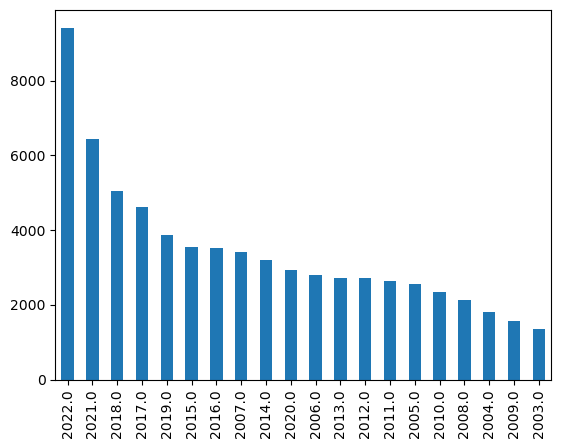

In [67]:
df['model_year'].value_counts().nlargest(20).plot(kind='bar')

<AxesSubplot:>

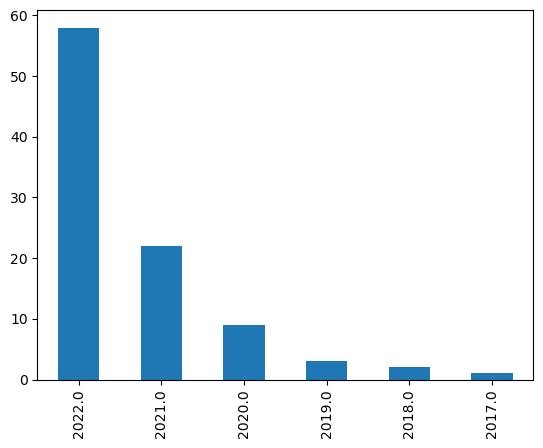

In [68]:
df_ev['model_year'].value_counts().nlargest(20).plot(kind='bar')

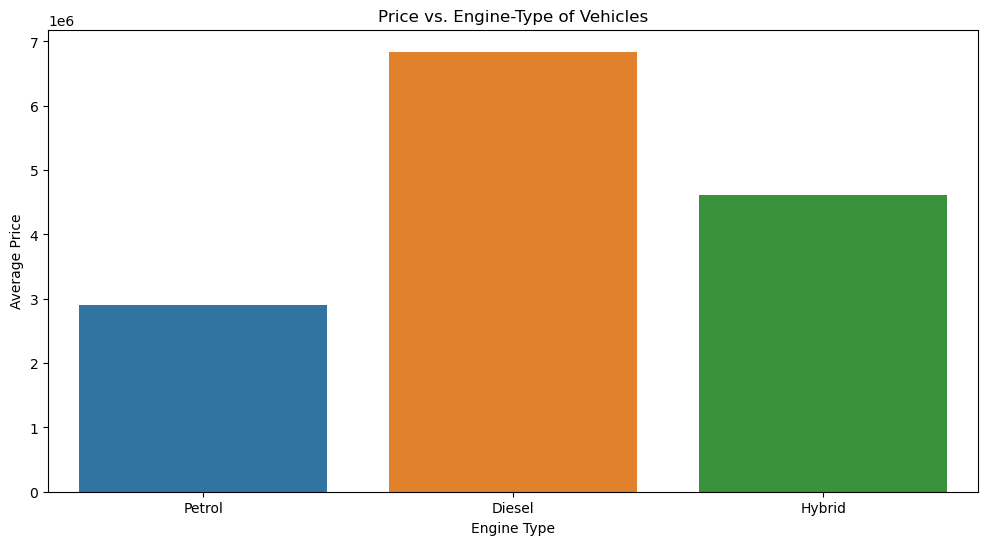

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x="engine_type", y="price", data=df, ci=None)
plt.title("Price vs. Engine-Type of Vehicles")
plt.ylabel("Average Price")
plt.xlabel("Engine Type")
plt.show()

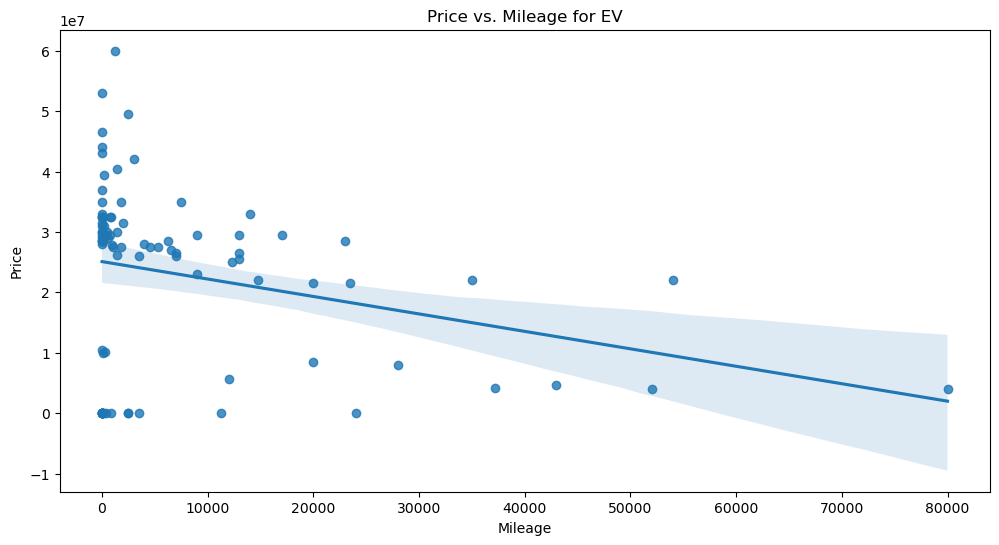

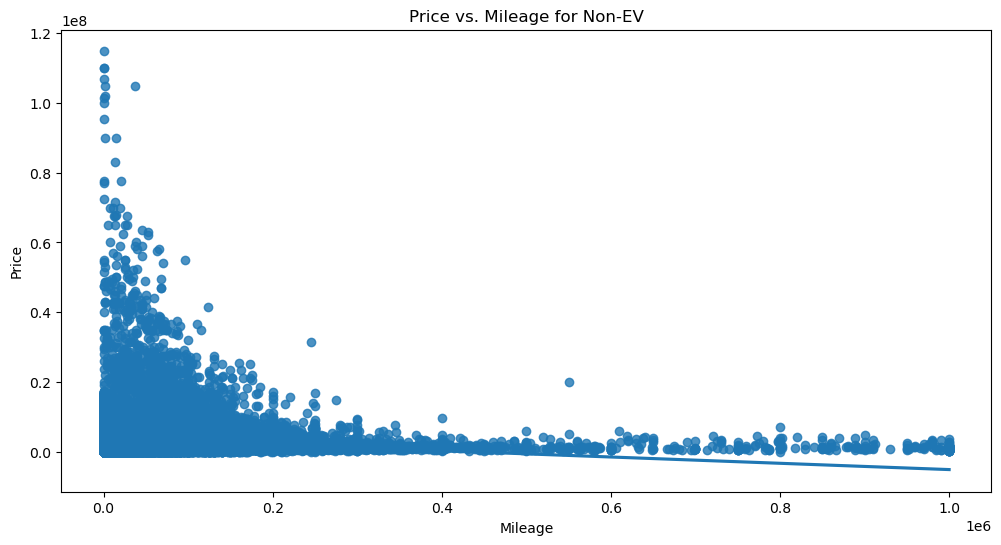

In [70]:
plt.figure(figsize=(12, 6))
sns.regplot(x="mileage", y="price", data=df_ev)
plt.title("Price vs. Mileage for EV")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()


plt.figure(figsize=(12, 6))
sns.regplot(x="mileage", y="price", data=df)
plt.title("Price vs. Mileage for Non-EV")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

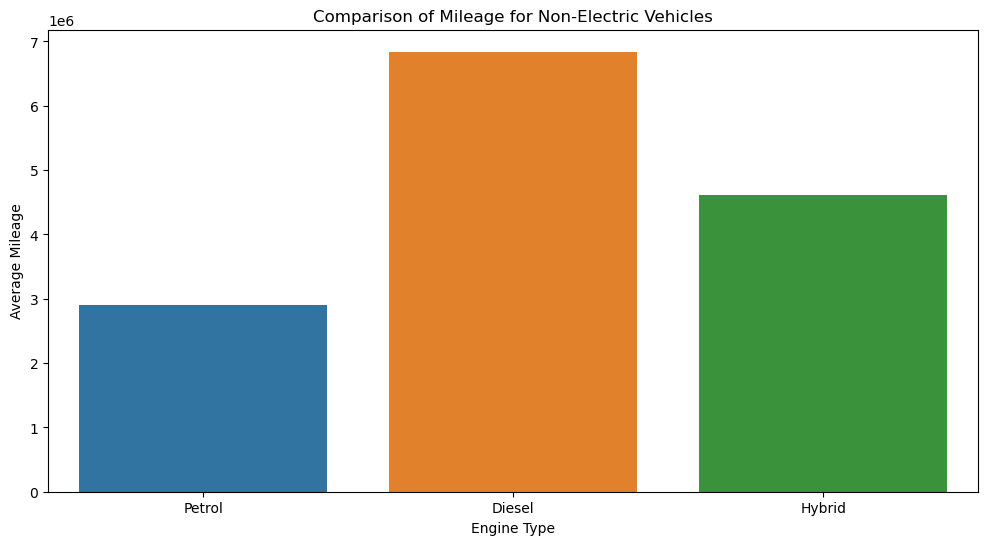

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x="engine_type", y="price", data=df, ci=None)
plt.title("Comparison of Mileage for Non-Electric Vehicles")
plt.ylabel("Average Mileage")
plt.xlabel("Engine Type")
plt.show()

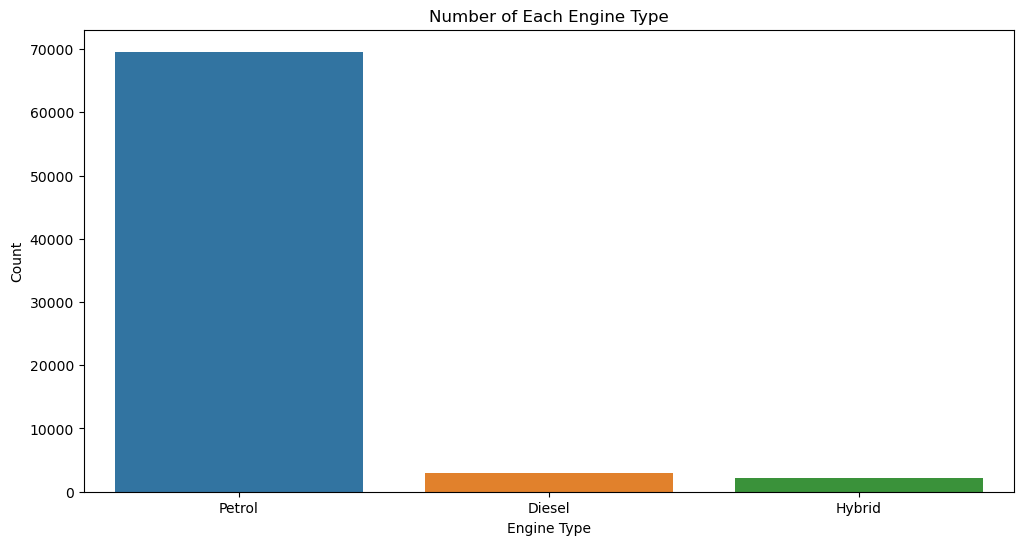

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x="engine_type", data=df)
plt.title("Number of Each Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.show()

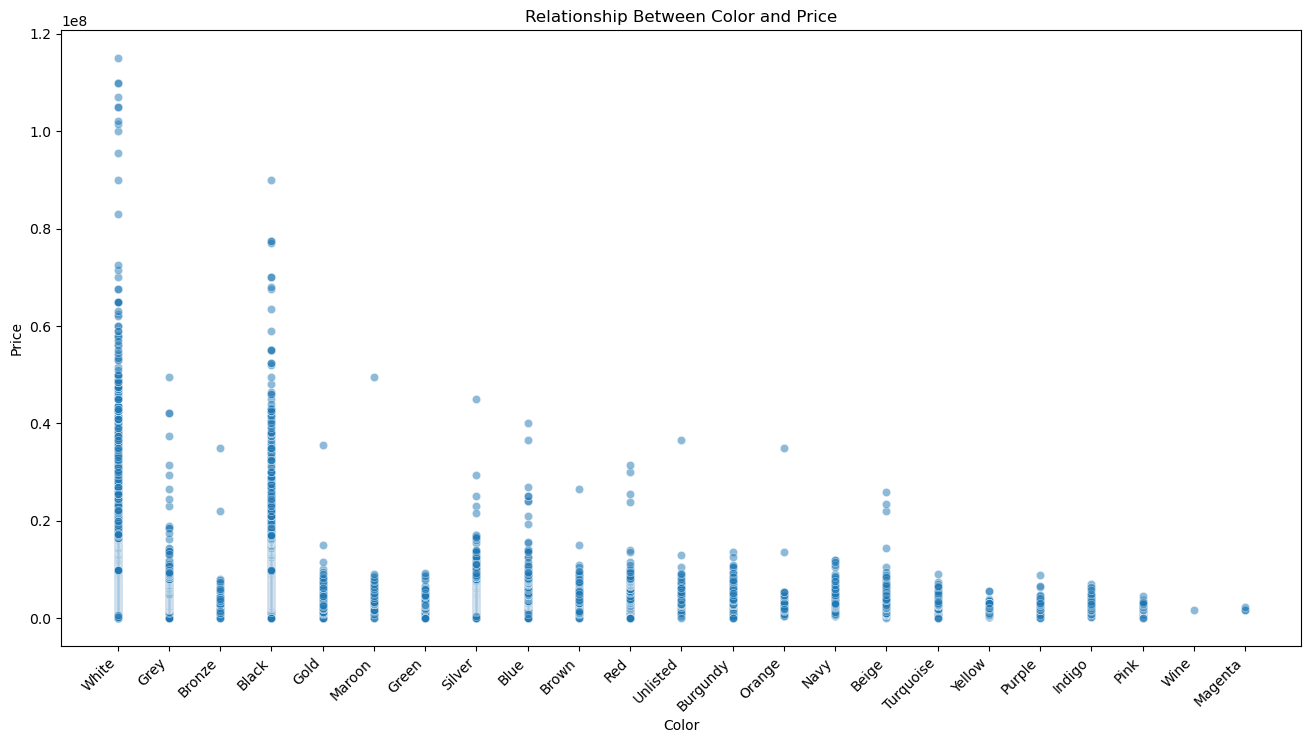

In [73]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x="color", y="price", data=df, alpha=0.5)
plt.title("Relationship Between Color and Price")
plt.xlabel("Color")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [76]:
df.to_csv("non-ev.csv")
df_ev.to_csv("evs.csv")